## 安裝Fuzzy package

In [1]:
# !pip install scikit-fuzzy

## 建立 Fuzzy Set 及設定數值範圍 

In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
import skfuzzy.control as fuzz_ctrl
from mpl_toolkits.mplot3d import Axes3D

# Range

## range of temp. & soil & watering 
x_temp_range = np.arange(10,86,1,np.float32)
x_soil_range = np.arange(10,91,1,np.float32)
y_time_range=np.arange(0,16,1,np.float32)
##　variable and membership functions
x_temp = fuzz_ctrl.Antecedent(x_temp_range,"temp")
x_soil= fuzz_ctrl.Antecedent(x_soil_range,"soil")
y_time = fuzz_ctrl.Consequent(y_time_range,"time")

## Membership functions

In [3]:
temp_MF = [[10, 10, 25, 35], [25, 35, 45], [35, 45, 55], [45, 55, 65], [55, 65, 85, 85]]
soil_MF = [[10,10,25,35],[25,35,55,65],[55,65,90,90]]
time_MF = [[0,0,3,6],[4,6,9,11],[9,12,15,15]]

In [4]:
x_temp["cold"] = fuzz.trapmf(x_temp_range, temp_MF[0])
x_temp["cool"] = fuzz.trimf(x_temp_range, temp_MF[1])
x_temp["normal"] = fuzz.trimf(x_temp_range, temp_MF[2])
x_temp["warm"] = fuzz.trimf(x_temp_range, temp_MF[3])
x_temp["hot"] = fuzz.trapmf(x_temp_range,temp_MF[4])

x_soil["dry"] = fuzz.trapmf(x_soil_range, soil_MF[0])
x_soil["moist"] = fuzz.trapmf(x_soil_range, soil_MF[1])
x_soil["wet"] = fuzz.trapmf(x_soil_range, soil_MF[2])

y_time["short"] = fuzz.trapmf(y_time_range, time_MF[0])
y_time["medium"] = fuzz.trapmf(y_time_range, time_MF[1])
y_time["long"] = fuzz.trapmf(y_time_range, time_MF[2])



## Rules

In [5]:
## 質心模糊
y_time.defuzzify_method = "centroid"
## 輸出規則 
rule_long=fuzz_ctrl.Rule(antecedent=((x_temp["hot"] & x_soil["dry"])
                                    |(x_temp["warm"] & x_soil["dry"])
                                    |(x_temp["normal"] & x_soil["dry"])
                                    |(x_temp["cool"] & x_soil["dry"])
                                    |(x_temp["hot"] & x_soil["moist"])), 
                                    consequent=y_time["long"], label="long")

rule_med=fuzz_ctrl.Rule(antecedent=((x_temp["cold"] & x_soil["dry"])
                                   |(x_temp["warm"] & x_soil["moist"])
                                   |(x_temp["normal"] & x_soil["moist"])
                                   |(x_temp["cool"] & x_soil["moist"])), 
                                   consequent = y_time["medium"], label="medium")

rule_short=fuzz_ctrl.Rule(antecedent=((x_temp["cold"]&x_soil["moist"])
                                     |(x_temp["hot"]&x_soil["wet"])
                                     |(x_temp["warm"]&x_soil["wet"])
                                     |(x_temp["normal"]&x_soil["wet"])
                                     |(x_temp["cool"]&x_soil["wet"])
                                     |(x_temp["cold"]&x_soil["wet"])), 
                                     consequent=y_time["short"],label="short")



In [6]:
system=fuzz_ctrl.ControlSystem(rules=[rule_long,rule_med,rule_short])
sys_sim=fuzz_ctrl.ControlSystemSimulation(system)


## User input

In [7]:
# define the range
# ----To run this cell, it has to run the previous cell first---- #
min_temp_value = 10
max_temp_value = 85
min_soil_value = 10
max_soil_value = 90
input_temp = 0
input_soil = 0
while True:
    input_temp=input("請輸入溫度(celsius(°C))")
    input_soil=input("請輸入土壤濕度")
    if (input_temp.isdigit() and input_soil.isdigit()):
        if (int(input_temp) >= min_temp_value and int(input_temp) <= max_temp_value and int(input_soil) >= min_soil_value and int(input_soil) <= max_soil_value):
            break
        else:
            print("輸入值超出範圍")

sys_sim.input["temp"]=int(input_temp)
sys_sim.input["soil"]=int(input_soil)

## system compute
sys_sim.compute()
out_y=sys_sim.output["time"]
round_out_y=round(out_y,2)
print(f"溫度:{input_temp}°C,濕度:{input_soil}%,輸出時間為{round_out_y}分鐘")

溫度:50°C,濕度:50%,輸出時間為7.5分鐘


## 可視化

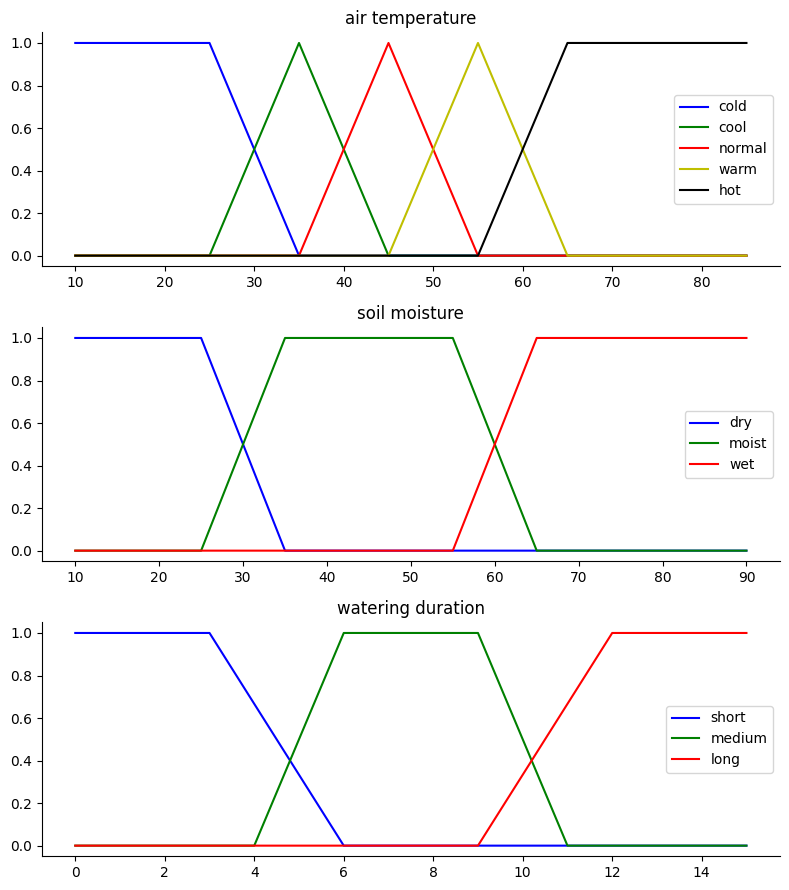

In [8]:
# Visualize these universes and membership functions
fig,(figure1,figure2,figure3)=plt.subplots(nrows=3,figsize=(8,9))
figure1.plot(x_temp_range,fuzz.trapmf(x_temp_range, temp_MF[0]),'b',linewidth=1.5,label='cold')
figure1.plot(x_temp_range,fuzz.trimf(x_temp_range, temp_MF[1]),'g',linewidth=1.5,label='cool')
figure1.plot(x_temp_range,fuzz.trimf(x_temp_range, temp_MF[2]),'r',linewidth=1.5,label='normal')
figure1.plot(x_temp_range,fuzz.trimf(x_temp_range, temp_MF[3]),'y',linewidth=1.5,label='warm')
figure1.plot(x_temp_range,fuzz.trapmf(x_temp_range, temp_MF[4]),'k',linewidth=1.5,label='hot')
figure1.set_title('air temperature')
figure1.legend()

figure2.plot(x_soil_range,fuzz.trapmf(x_soil_range, soil_MF[0]),'b',linewidth=1.5,label='dry')
figure2.plot(x_soil_range,fuzz.trapmf(x_soil_range, soil_MF[1]),'g',linewidth=1.5,label='moist')
figure2.plot(x_soil_range,fuzz.trapmf(x_soil_range, soil_MF[2]),'r',linewidth=1.5,label='wet')
figure2.set_title('soil moisture')
figure2.legend()

figure3.plot(y_time_range,fuzz.trapmf(y_time_range, time_MF[0]),'b',linewidth=1.5,label='short')
figure3.plot(y_time_range,fuzz.trapmf(y_time_range, time_MF[1]),'g',linewidth=1.5,label='medium')
figure3.plot(y_time_range,fuzz.trapmf(y_time_range, time_MF[2]),'r',linewidth=1.5,label='long')
figure3.set_title('watering duration')
figure3.legend()

# plot 2d figures
for fi in (figure1,figure2,figure3):
  fi.spines['top'].set_visible(False)
  fi.spines['right'].set_visible(False)
  fi.get_xaxis().tick_bottom()
  fi.get_yaxis().tick_left()

plt.tight_layout()



# 3D figure


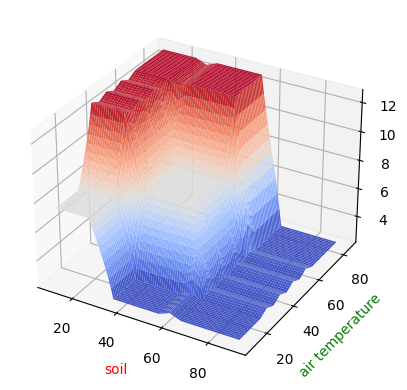

In [9]:
from mpl_toolkits.mplot3d import Axes3D# Required for 3D plotting
def funz(x,y):
  sys_sim.input["temp"] = y
  sys_sim.input["soil"] = x 
  sys_sim.compute()
  z=sys_sim.output["time"]
  return z

fig1=plt.figure()#建立一個繪圖物件
ax=Axes3D(fig1)#用這個繪圖物件建立一個Axes物件(有3D座標)
ax = fig1.add_subplot(111, projection='3d')#建立一個三維的繪圖物件


X,Y = np.meshgrid(x_soil_range,x_temp_range)
Z = funz(X,Y)
ax.plot_surface(X, Y, Z, rstride=1,cstride=1,cmap=plt.cm.coolwarm)#用取樣點(x,y,z)去構建曲面
ax.set_xlabel('soil',color='r')
ax.set_ylabel('air temperature',color='g')
ax.set_zlabel('watering',color='b')#給三個座標軸註明
plt.show()#顯示模組中的所有繪圖物件


In [10]:
for i in range(5):
    print(i)

0
1
2
3
4
